# Hotel Reservations
Para este proyecto se utilizara el siguiente dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset, el cual contiene datos sobre los distintos tipos de reservas de un hotel y si sus huéspedes asistieron a la misma o la cancelaron.


### Objetivos:
- Analizar cada variable de manera individual para **describir y visualizar** las frecuencias de las mismas.
- Hacer un análisis **explorando** la relación entre la variable 'bookig_status' (el estado de la reserva) y el resto de variables.
- Hacer un **escalado de datos y un balanceo de clases** para normalizar y equilibrar los valores de algunas variables.
- Intentar **predecir** si futuros clientes cancelaran o no su reserva, a partir del entrenamiento de un modelo de Machine Learning.

<br>

**Variables del dataset:**

1. "Booking_ID": unique identifier of each booking <br>
2. "no_of_adults": Number of adults <br>
3. "no_of_children": Number of Children <br>
4. "no_of_weekend_nights": Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel <br>
5. "no_of_week_nights": Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel <br>
6. "type_of_meal_plan": Type of meal plan booked by the customer <br>
7. "required_car_parking_space": Does the customer require a car parking space? (0 - No, 1- Yes) <br>
8. "room_type_reserved": Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels. <br>
9. "lead_time": Number of days between the date of booking and the arrival date <br>
10. "arrival_year": Year of arrival date <br>
11. "arrival_month": Month of arrival date
12. "arrival_date": Date of the month <br>
13. "market_segment_type": Market segment designation. <br>
14. "repeated_guest": Is the customer a repeated guest? (0 - No, 1- Yes) <br>
15. "no_of_previous_cancellations": Number of previous bookings that were canceled by the customer prior to the current booking <br>
16. "no_of_previous_bookings_not_canceled": Number of previous bookings not canceled by the customer prior to the current booking <br>
17. "avg_price_per_room": Average price per day of the reservation; prices of the rooms are dynamic. (in euros) <br>
18. "no_of_special_requests": Total number of special requests made by the customer (e.g. high floor, view from the room, etc) <br>
19. "booking_status": Flag indicating if the booking was canceled or not. <br>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hotel-reservations.csv")
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Análisis exploratorio:
- ### **Se analiza la relación de cada variable predictora con la variable a predecir ('booking_status')**

In [3]:
#Primero agrego una nueva columna con los valores binarios de la variable a predecir 
dic = {'Not_Canceled':0, 'Canceled':1}
data['booking_status'] = data['booking_status'].map(dic)

## Boxplots y variables numéricas
- Se reconoce la existencia de varios **valores atípicos o outliers** en algunas variables, los cuales seran tratados mas  para poder así luego poder entrenar los datos en un modelo predictivo

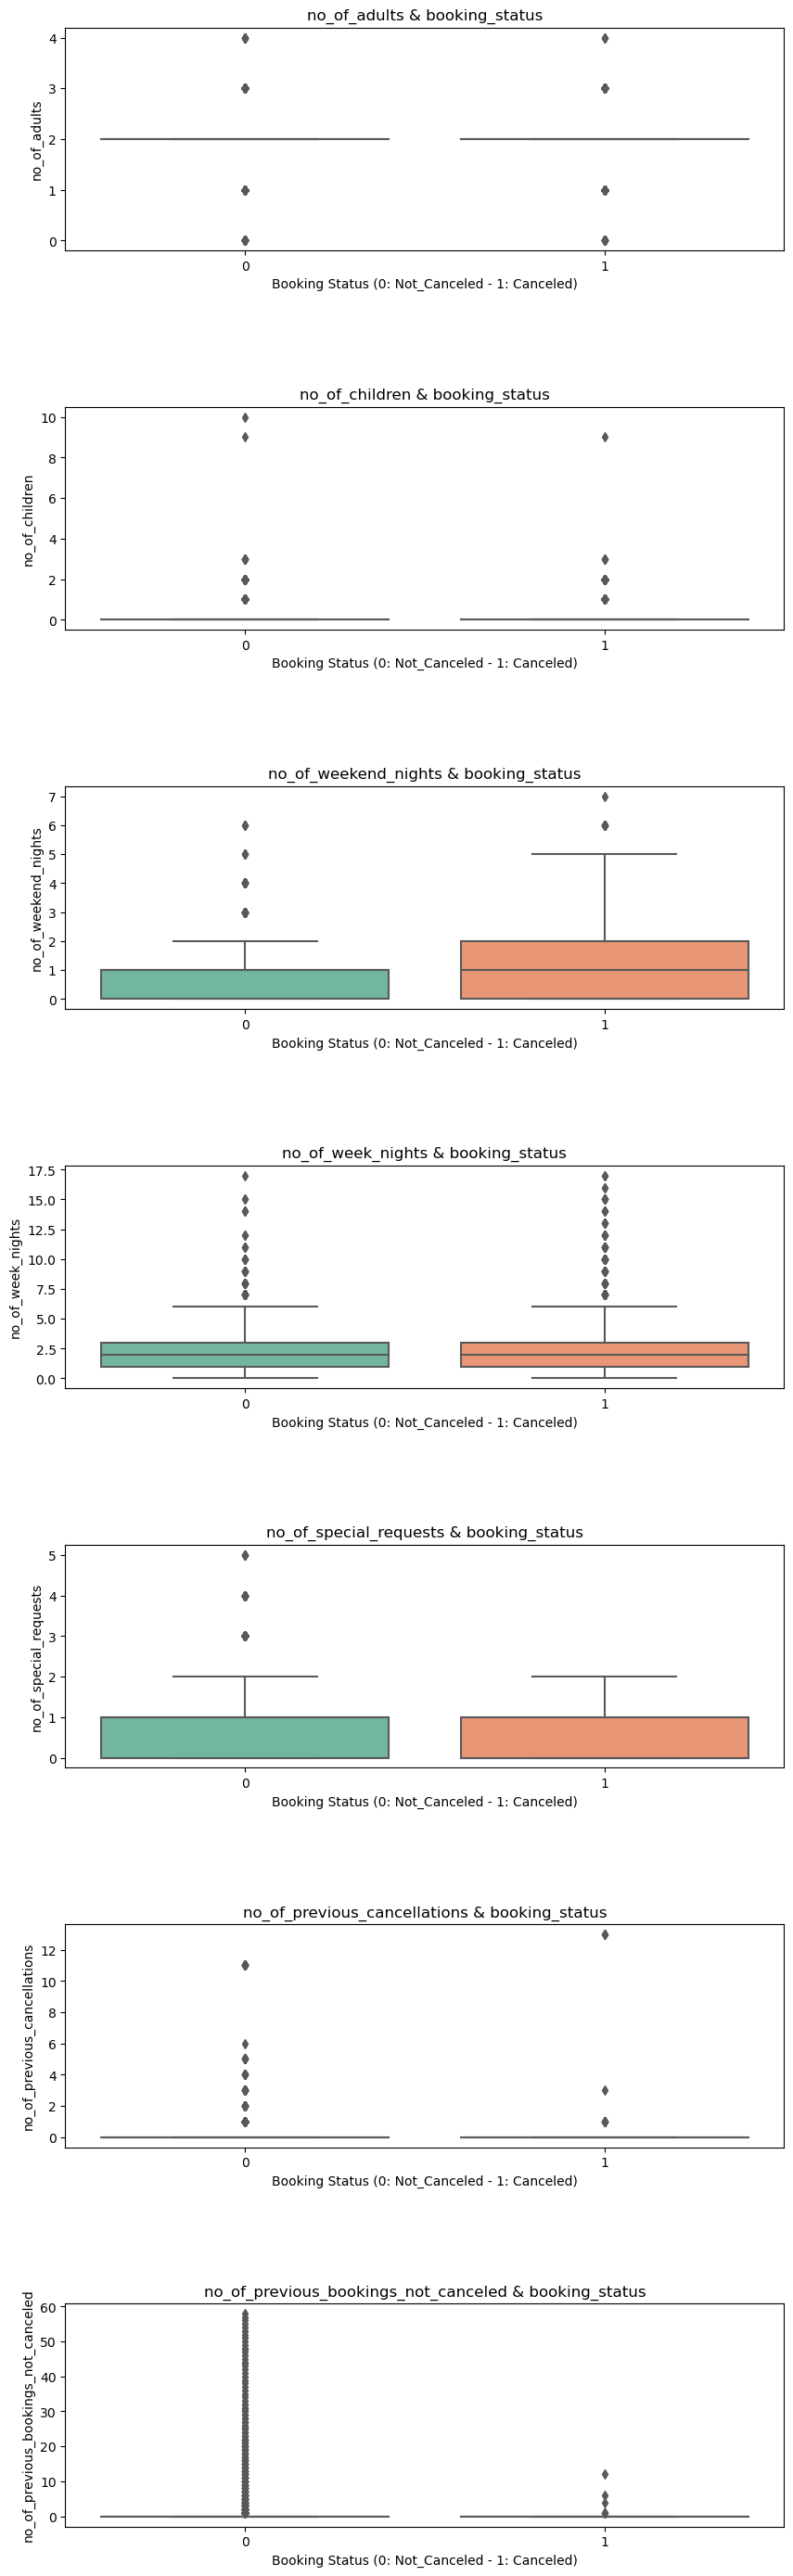

In [4]:
col_num_1 = ['no_of_adults','no_of_children',
             'no_of_weekend_nights','no_of_week_nights', 
             'no_of_special_requests','no_of_previous_cancellations',
             'no_of_previous_bookings_not_canceled']

fig, ax = plt.subplots(nrows=len(col_num_1), ncols=1, figsize=(10,35))
fig.subplots_adjust(hspace=0.7)

for i, col in enumerate(col_num_1):
    sns.boxplot(x='booking_status', y=col, data=data, ax=ax[i], palette = 'Set2')
    ax[i].set_xlabel('Booking Status (0: Not_Canceled - 1: Canceled)')
    ax[i].set_title(col+ ' & booking_status')

## Observaciones:
- Las variables 'no_of_adults','no_of_children','no_of_week_nights' no presentan diferencias entre los huéspedes que si cancelaron y los que no. La mediana coincide en las tres y tambien presentan una cantidad muy similar de valores atipicos. 
- En las variables 'no_of_special_requests','no_of_previous_cancellations','no_of_previous_bookings_not_canceled' se observan mayor cantidad de valores atipicos en los huespedes que no cancelaron su reserva.
- En la variable **'no_of_weekend_nights'** hay mayores diferencias entre los huéspedes que cancelaron y los que no cancelaron la reserva. Se observa que hay mayor variabilidad en los datos de huéspedes que si cancelaron.<br>
Los que si cancelaron, habían reservado en promedio un máximo de 5 noches de fin de semana, mientras que los que no cancelaron habían reservado un máximo de 2 noches del fin de semana. <br>


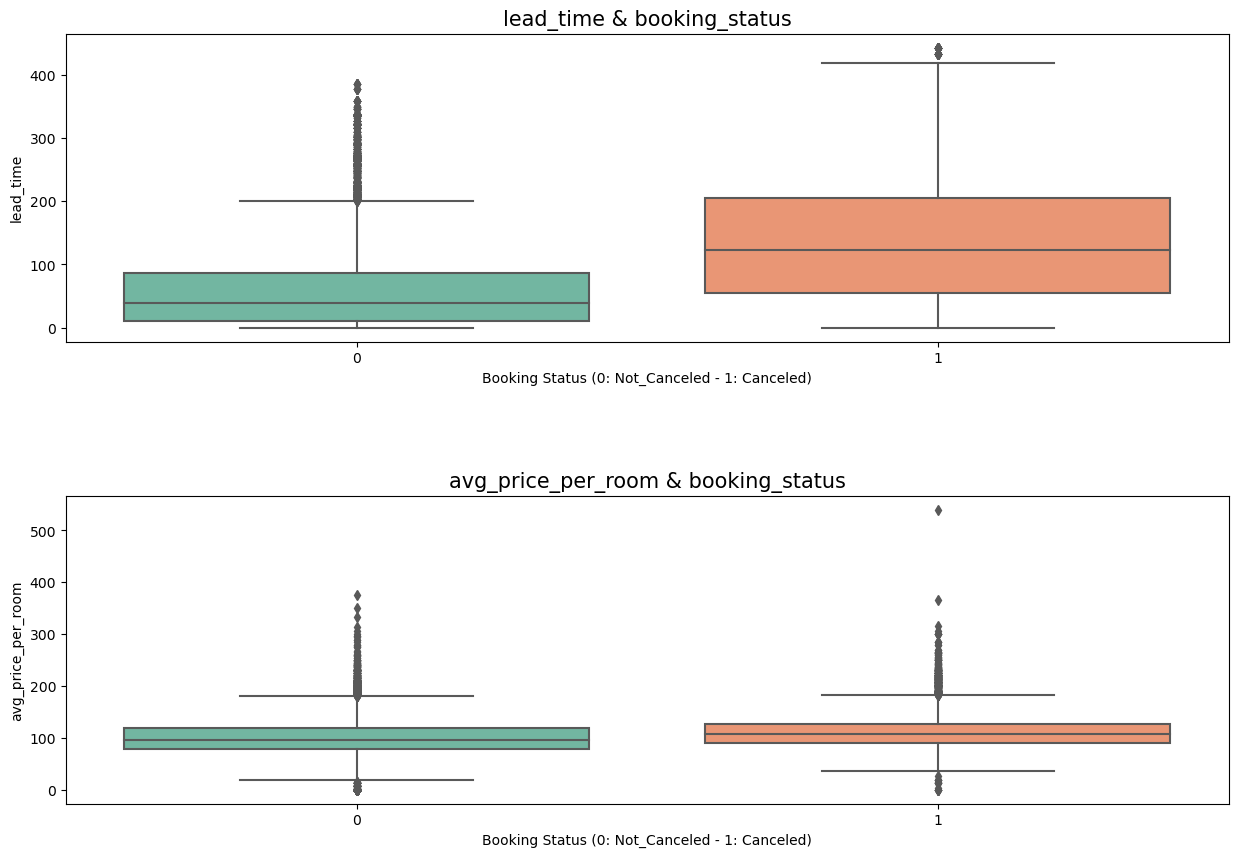

In [5]:
col_num_2 = ['lead_time', 'avg_price_per_room']

fig, ax = plt.subplots(nrows=len(col_num_2), ncols=1, figsize=(15,10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num_2):
    sns.boxplot(x='booking_status', y=col, data=data, ax=ax[i], palette = 'Set2')
    ax[i].set_xlabel('Booking Status (0: Not_Canceled - 1: Canceled)')
    ax[i].set_title(col+ ' & booking_status', fontdict={'size':15})

## Observaciones:
- La variable **'lead_time'** presenta diferencias entre los huéspedes que cancelaron y los que no. Los que si cancelaron la reserva tienen un valor promedio máximo de días bastante mayor a los que no cancelaron (400 vs 200).<br>
La variabilidad de los datos tambien es mayor en los huéspedes que si cancelaron, con una mediana de aprox 120 dias, mientras que los que no cancelaron la mediana es de 40 días aprox. <br>
Por otro lado, los huéspedes que no cancelaon presentan mayor cantidad de valores atípicos entre los 200 y 400 días


# Tasas de conversión
Nos referimos a la **tasa de conversión** como una métrica que demuestra la relación entre el total de huéspedes que hacieron una reserva y el número de huéspedes que realizaron una cancelación de la reserva. 

In [6]:
def graficar_tasa_conversion(var_predictora, var_predecir, type='bar'):
    x,y = var_predictora, var_predecir
    
    grupo = data.groupby(x)[y].mean().mul(100).rename('tasa_conversion').reset_index()
    
    if type == 'bar':
        plt.figure(figsize=(10,5))
        sns.barplot(x=var_predictora, y='tasa_conversion', data=grupo, palette = 'Set2').set(title='Tasa de conversion para: ' + col,
                                                                           ylabel = 'Tasa de conversión (%)')
        #sns.despine()
        plt.grid(color='black', linewidth=0.05)
        
    elif type == 'line':
        plt.figure(figsize=(10,5))
        sns.lineplot(x=var_predictora, y='tasa_conversion', data=grupo, color = '#3CB371', markers=True).set(title='Tasa de conversion para: ' + col,
                                                                           ylabel = 'Tasa de conversión en (%)')
        #sns.despine()
        plt.grid(color='black', linewidth=0.05)
        
    elif type == 'scatter':
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=var_predictora, y='tasa_conversion', data=grupo, color = '#3CB371').set(title='Tasa de conversion para: ' + col,
                                                                           ylabel = 'Tasa de conversión en (%)')
        sns.despine()
        plt.grid(color='black', linewidth=0.05)

# Variables categóricas:

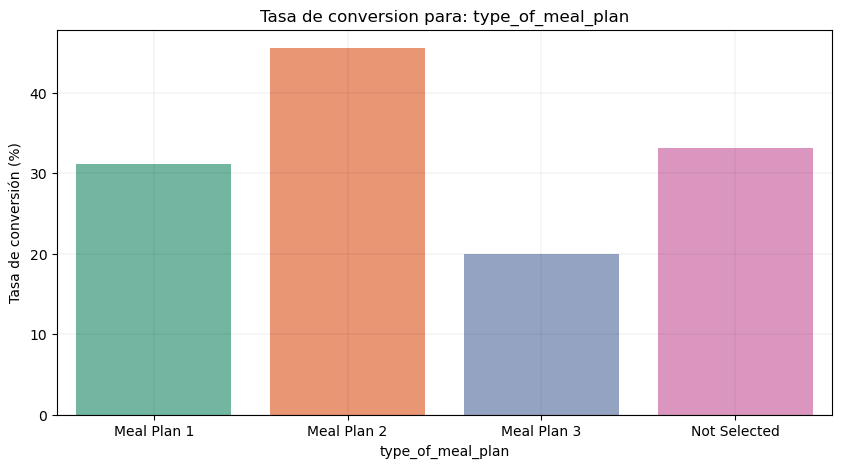

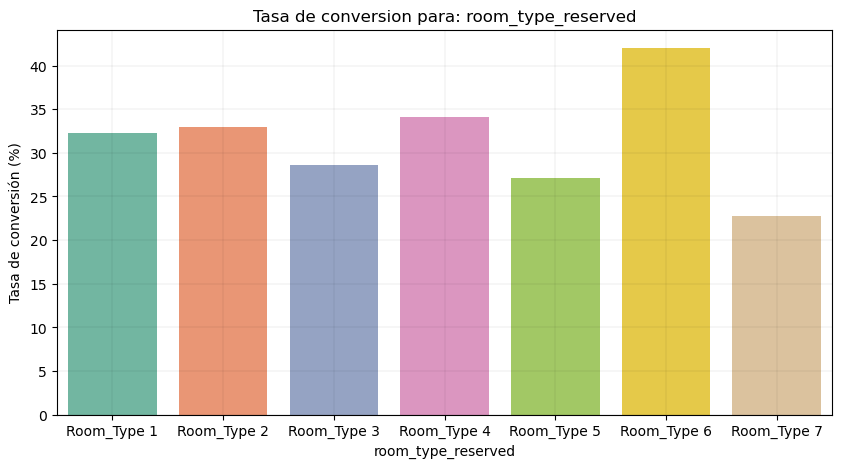

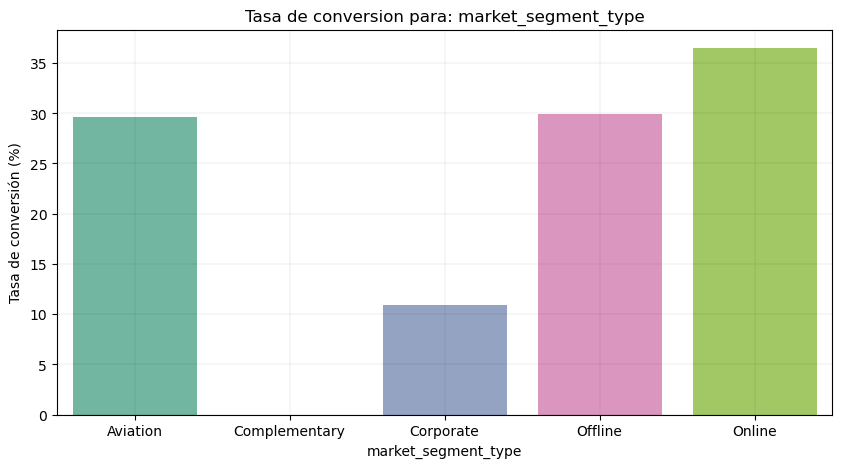

In [7]:
col_cat = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

for i, col in enumerate(col_cat):
    graficar_tasa_conversion(col, 'booking_status', type = 'bar')

## Observaciones:
- **'type_of_meal_plan':** las tasas de conversión oscilan entre el 20 y 46%. El plan de comidas número 2 es el que tiene mayor tasa de conversion, 46%
- **'room_type_reserved':** las tasas de conversión oscilan entre el 23 y 42%. El tipo de habitacion número 6 tiene mayor tasa de conversion, 42%
- **'market_segment_type':** En esta variable hay valores atipicos ya que entre Aviation, Corporate y Complementary suman un  6,5% de los casos totales.<br>
El segmento de mercado con mayor tasa de conversión es el Online con 37%, seguidos por el Offline y el Aviation con aprox un 30%. Luego Corporate con un 12% y por último, Complementary con un 0%. 

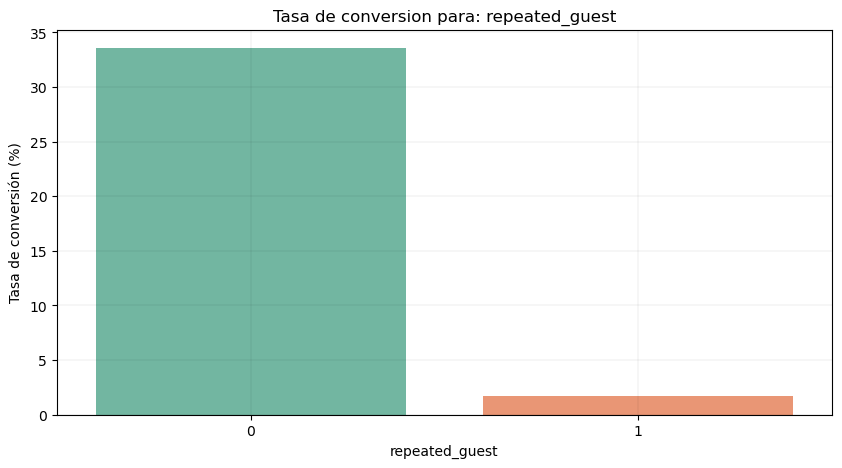

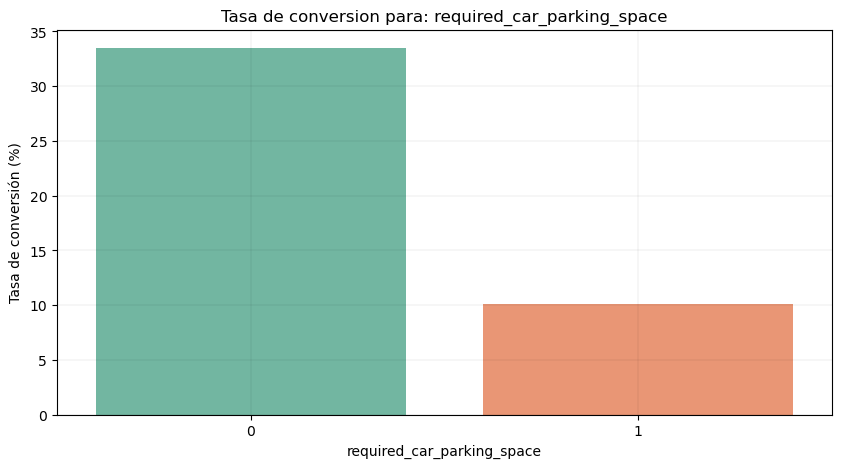

In [8]:
col_cat_2 = ['repeated_guest','required_car_parking_space']

for i, col in enumerate(col_cat_2):
    graficar_tasa_conversion(col, 'booking_status', type = 'bar')

## Observaciones:
- **'repeated_guest':** Esta variable tiene un desbalanceo grande de clases ya que los huéspedes NO repetidos representan el 97% de los casos totales y los huéspedes repetidos solo el 2.50% <br>
Los huéspedes NO repetidos tienen una tasa de conversión mucho mayor que los huéspedes repetidos, 33% vs 2%
- **'required_car_parking_space':** Esta variable tambien tiene un gran desbalanceo de clases, los huéspedes que NO solicitaron estacionamiento representan un 96% de los casos totales y los que si solo un 3% <br> Los huéspedes que NO requirieron estacionamiento tienen una tasa de conversión del 33% mientras que los que si requirieron estacionamiento tienen una tasa del 10%

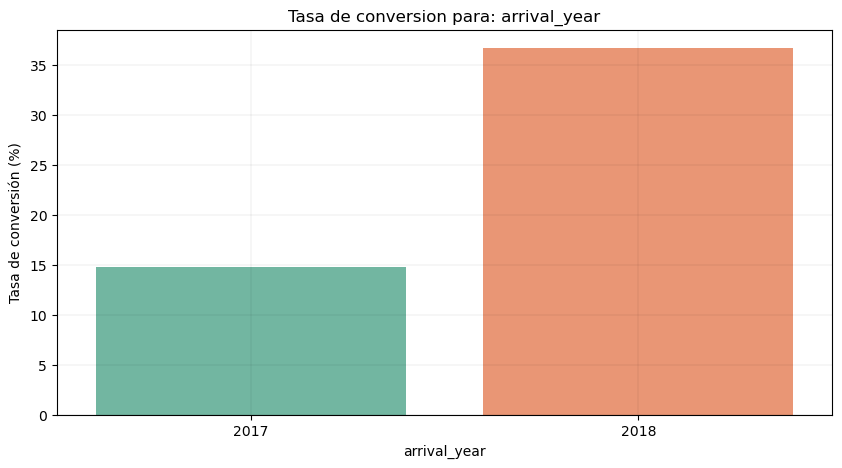

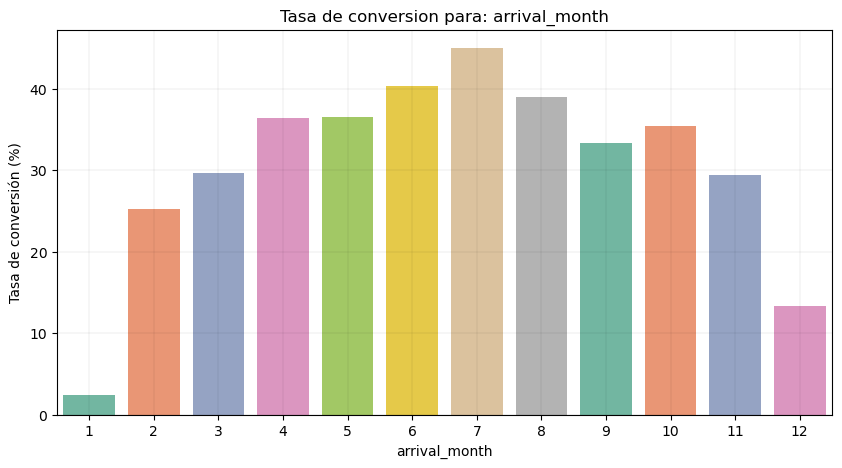

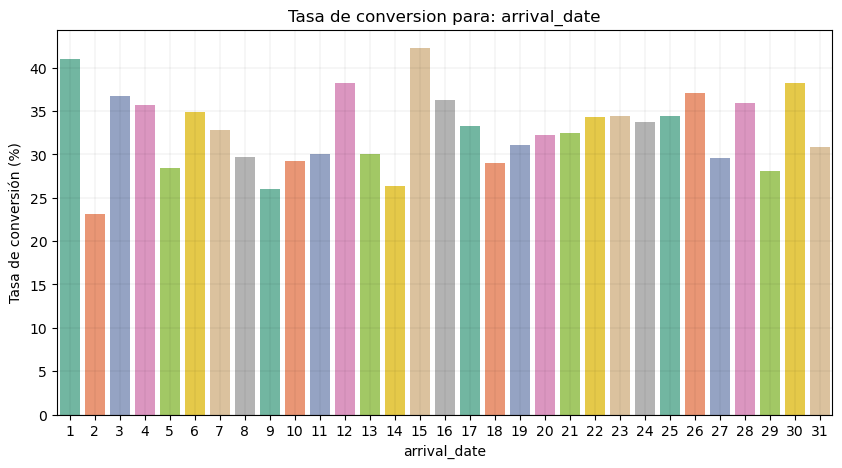

In [9]:
col_cat_3 = ['arrival_year','arrival_month', 'arrival_date']

for i, col in enumerate(col_cat_3):
    graficar_tasa_conversion(col, 'booking_status', type = 'bar')

## Observaciones:
- **'arrival_year':** los huéspedes que llegaron en el 2018 tinene una tasa de conversión del 36-37%, mientras que los que llegaron en el 2017 tienen una tasa del 14,9%.<br>
En esta variable hay desbalanceo grande de clases, la cantidad de huéspedes en 2018 es cuatro veces mas la cantidad de huéspedes del 2017.
- **'arrival_month'**: Las tasas oscilan entre el 25 y el 45%.<br>
La mayor tasa de conversión corresponde al mes 7-Julio con el 45%. Seguidos por 6-Junio con 40,5% y 8-Agosto con 39%. <br>
El mes 1-Enero y 12-Diciembre  tienen las tasas de conversión mas bajas, menores 15%
- **'arrival_date':** Las tasas oscilan entre el 23 y 45%. <br>
Los días en los que se observan mayores tasas de conversión son el día 15 (mitad de mes) con 45% , el día 1 (principio de mes) con 42% y los días 12 y 30 (mitad y finde mes) con 38%. <br>
El día con menor tasa de conversión es el día 2 con 23%

# Variables numéricas:

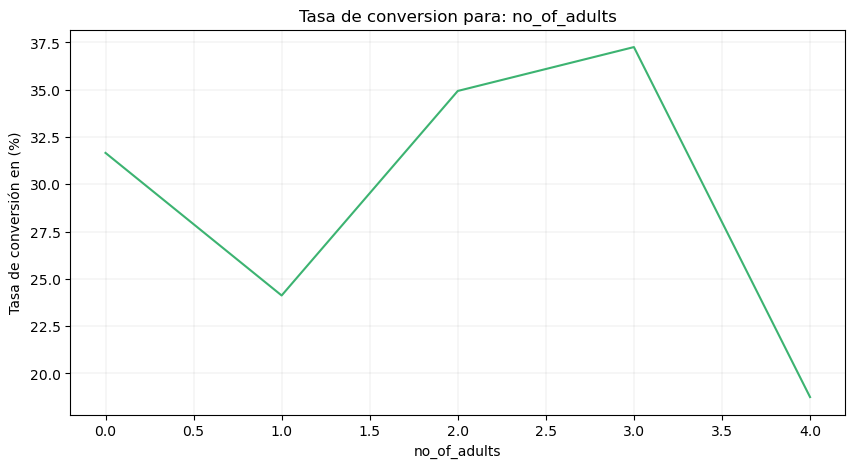

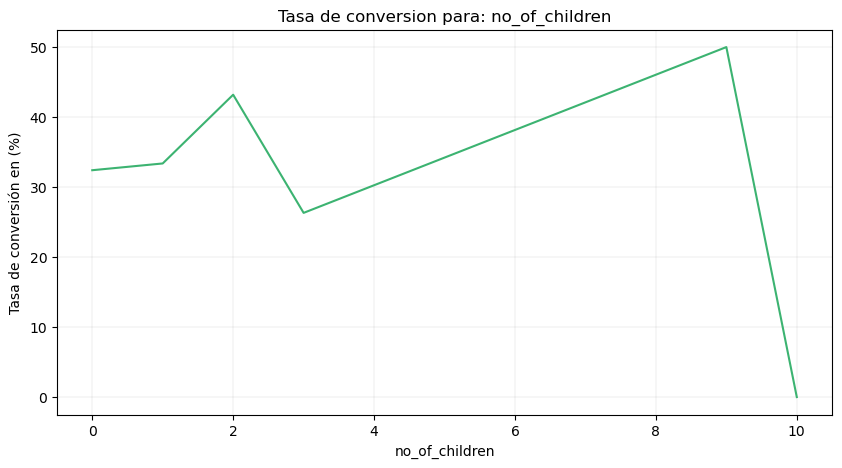

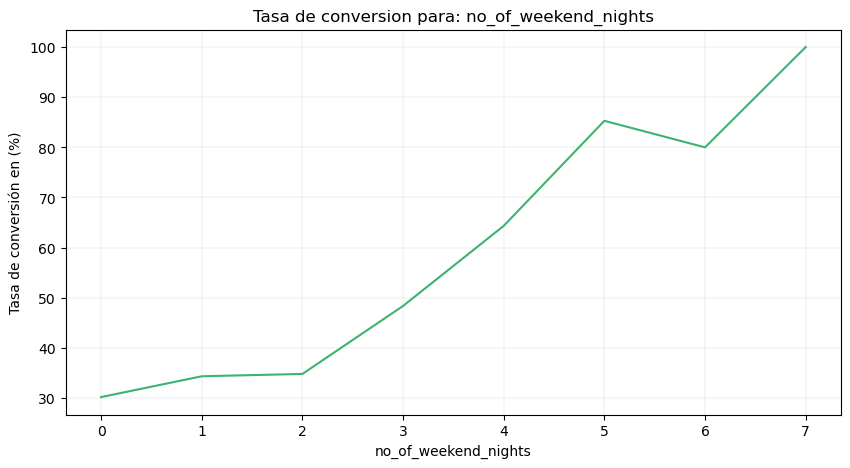

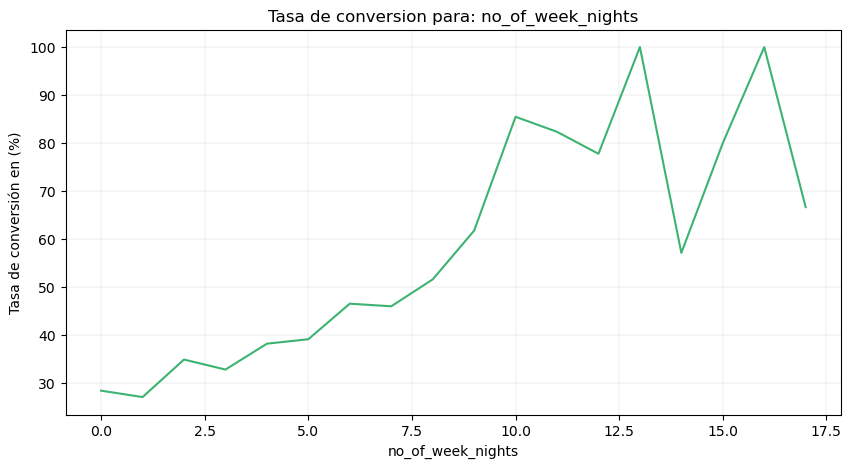

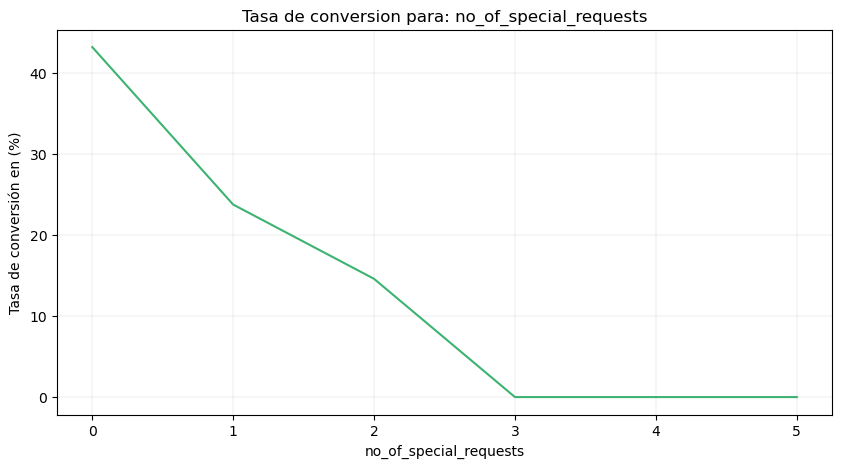

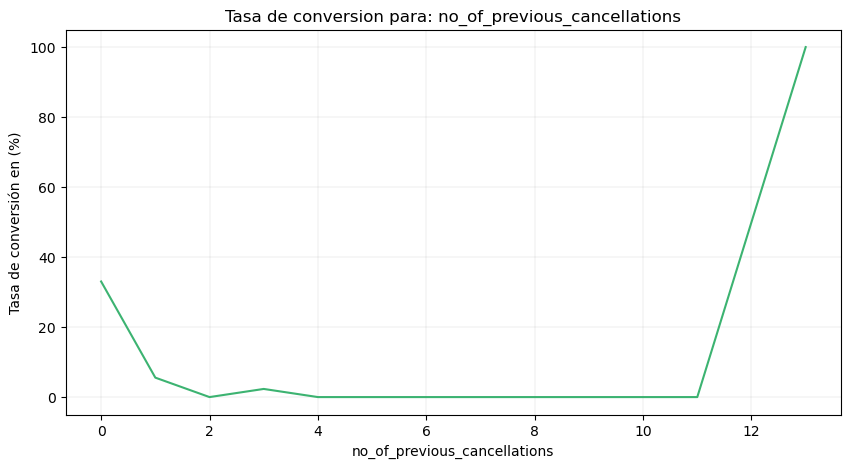

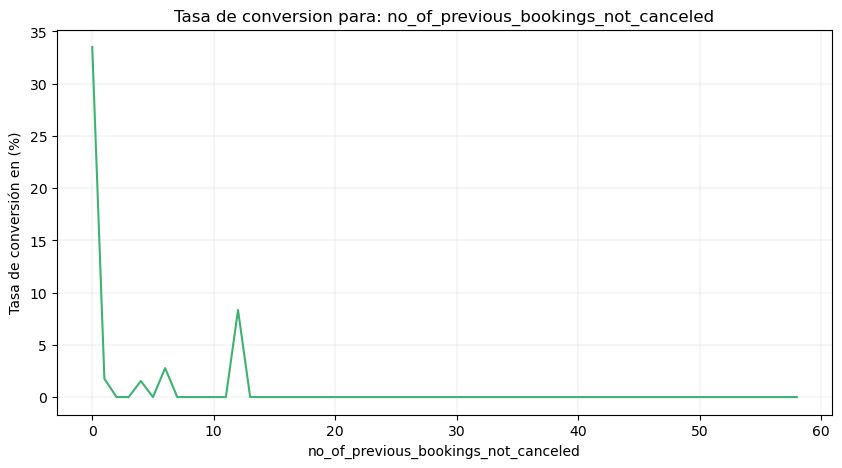

In [10]:
col_num_1 = ['no_of_adults','no_of_children',
             'no_of_weekend_nights','no_of_week_nights', 
             'no_of_special_requests','no_of_previous_cancellations',
             'no_of_previous_bookings_not_canceled']

for i, col in enumerate(col_num_1):
    graficar_tasa_conversion(col, 'booking_status', type = 'line')

## Observaciones:
- **'no_of_adults':** el número de adultos con mayor tasa de conversión es 3 con un 37%, y 4 adultos tienen una tasa del 18%.
- **'no_of_children':** el número de niños con mayor tasa de conversión es 9 con un 50%. 9 es un valor atipico, solo hay 2 casos. La siguiente tasa de conversión que es del 43% con una cantidad de 2 niños
- **'no_of_weekend_nights':** el número de noches de fin de semana con mayor tasa de conversión es 7 con un 100%. 7 es un valor atípico hay solo 1 caso. <br> Luego oscilan entre el 83 y 80% con 5 y 6 noches, las cuales también consideramos valores atipicos ya que hay menos de 100 casos. <br>La siguiente tasa de conversion mas alta es de 62% correspondiente a 4 noches del fin de semana. <br> La tasa de conversión para menos de 3 noches es por debajo del 50%
- **'no_of_week_nights':**  la cantidad de noches de semana con mayor tasa de conversión son 13 y 16 noches, ambas con una tasa del 100%, estos son valores atipicos ya que hay menos de 5 casos.  <br> A partir de las 9 noches la tasa es de entre 62 y 100%, exceptuando 14 noches tiene una tasa de conversion del 57%, pero estos valores tambien se consideran atipicos ya que hay menos de 100 casos. <br> Por debajo de 8 noches la tasa de conversion oscilan entre el 28 y el 55%.
- **'no_of_special_requests':** entre 1 y 2 pedidos especiales las tasas de conversión oscilan entre el 24 y el 15%
- **'no_of_previous_cancellations':** la mayor tasa de conversión corresponde a una cantidad de 13 cancelaciones previas con una tasa del 100%. 13 es un valor atipico ya que hay menos de 5 casos. <br> Aquellos huéspedes que previamente cancelaron 0 veces tienen una tasa del 30% <br>
Entre 1 y 4 veces tienen una tasa de conversion de menos del 5%
- **'no_of_previous_bookings_not_canceled'**: La mayor tasa de conversion del 37% corresponde a una cantidad 0 de reservas previas no canceladas. Una cantidad de 12 reservas previas no canceladas tiene una tasa del 8%. 

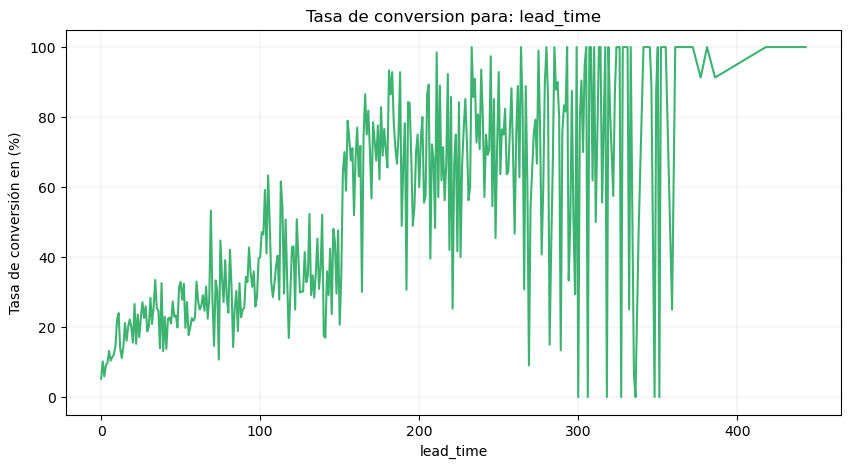

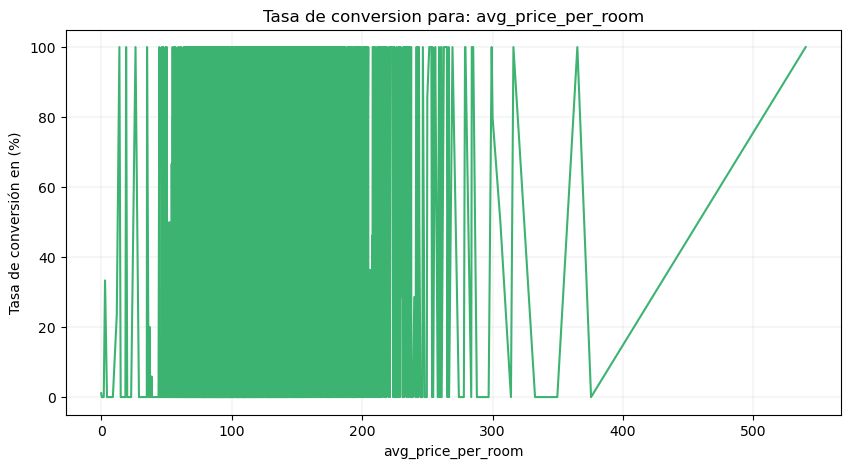

In [11]:
col_num_2 = ['lead_time', 'avg_price_per_room']

for i, col in enumerate(col_num_2):
    graficar_tasa_conversion(col, 'booking_status', type = 'line')


## Observaciones:
- Resulta dificil encontrar un patrón con tanta cantidad de datos, con lo cual vamos a separar en intervalos los valores de las variables.

### Creo un nuevo dataframe en donde defino intervalos para los valores de las variables 'lead_time' 'avg_price_per_room' y vuelvo a graficar las variable ahora con las agrupaciones

In [12]:
data_intervalos = data.copy(deep=True)

In [13]:
def graficar_tasa_conversion_intervalos(var_predictora, var_predecir, type='bar'):
    x,y = var_predictora, var_predecir
    
    grupo = data_intervalos.groupby(x)[y].mean().mul(100).rename('tasa_conversion').reset_index()
    
    if type == 'bar':
        plt.figure(figsize=(10,5))
        sns.barplot(x=var_predictora, y='tasa_conversion', data=grupo, palette = 'Set2', order=orden).set(title='Tasa de conversion para: ' + col,
                                                                           ylabel = 'Tasa de conversión (%)')
        sns.despine()
        plt.grid(color='black', linewidth=0.05)
        

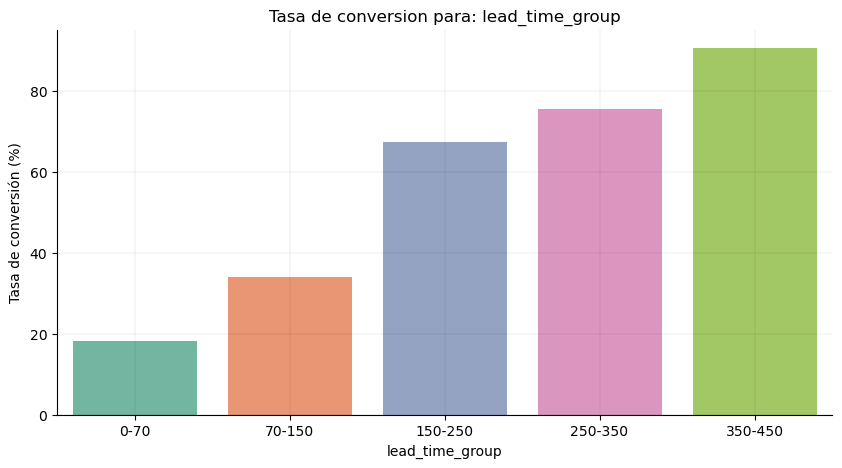

In [14]:
data_intervalos.loc[:,'lead_time_group'] = "0"
data_intervalos.loc[(data_intervalos['lead_time']>= 0) & (data_intervalos['lead_time']<70), 'lead_time_group'] = "0-70"
data_intervalos.loc[(data_intervalos['lead_time']>=70) & (data_intervalos['lead_time']<150), 'lead_time_group'] = "70-150"
data_intervalos.loc[(data_intervalos['lead_time']>=150) & (data_intervalos['lead_time']<250), 'lead_time_group'] = "150-250"
data_intervalos.loc[(data_intervalos['lead_time']>=250) & (data_intervalos['lead_time']<350), 'lead_time_group'] = "250-350"
data_intervalos.loc[(data_intervalos['lead_time']>=350) & (data_intervalos['lead_time']<450), 'lead_time_group'] = "350-450"


col_num_3 = ['lead_time_group']

orden = ["0-70", "70-150", "150-250", "250-350", "350-450"]

for i, col in enumerate(col_num_3):
    graficar_tasa_conversion_intervalos(col, 'booking_status', type = 'bar')

## Observaciones: 
- **'lead_time'**
- Ahora podemos identificar rangos mas distinguidos y su tasas de conversión. Entre mayor es la cantidad de días que hay entre el día de la reserva y el día de llegada, las tasas de conversión aumentan.
- Entre los  450 y 150 días la tasa de conversión oscila entre el 90 y 65%, habiando bastantes valores atípicos.
- A partir de los 150 días para abajo  la tasa de conversión llegan al 35% 

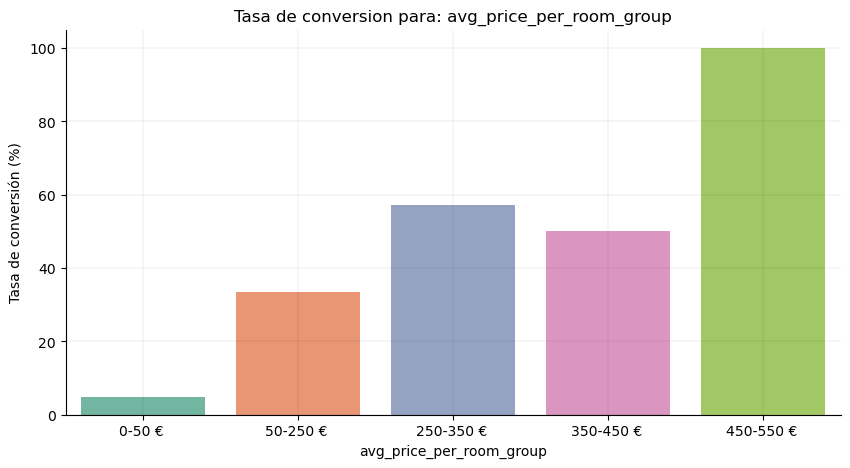

In [15]:
data_intervalos.loc[:,'avg_price_per_room_group'] = "0"
data_intervalos.loc[(data_intervalos['avg_price_per_room']>= 0) & (data_intervalos['avg_price_per_room']<50), 'avg_price_per_room_group'] = "0-50 € "
data_intervalos.loc[(data_intervalos['avg_price_per_room']>=50) & (data_intervalos['avg_price_per_room']<250), 'avg_price_per_room_group'] = "50-250 € "
data_intervalos.loc[(data_intervalos['avg_price_per_room']>=250) & (data_intervalos['avg_price_per_room']<350), 'avg_price_per_room_group'] = "250-350 € "
data_intervalos.loc[(data_intervalos['avg_price_per_room']>=350) & (data_intervalos['avg_price_per_room']<450), 'avg_price_per_room_group'] = "350-450 € "
data_intervalos.loc[(data_intervalos['avg_price_per_room']>=450) & (data_intervalos['avg_price_per_room']<550), 'avg_price_per_room_group'] = "450-550 € "


col_num_4 = ['avg_price_per_room_group']

orden = ['0-50 € ', '50-250 € ', '250-350 € ', '350-450 € ', '450-550 € ']

for i, col in enumerate(col_num_4):
    graficar_tasa_conversion_intervalos(col, 'booking_status', type = 'bar')

## Observaciones:
- **'avg_price_per_room'**
- En esta variable ahora también podemos identificar distintos rangos segun el precio promedio de las habitaciones en euros.
- Precios de habitación de entre 550 y 450 euros tienen la tasa de conversión mas alta del 100%. Estos valores son valores atipicos, ya que hay muy pocos casos.
- Entre 450 y 250 euros las tasas oscilan entre el 50 y 59%, también valores atipicos.
- Entre los 0 y 250 euros la tasa de conversión llega al 35%

### Exporto el nuevo dataset modificado

In [16]:
ruta = 'C:/Users/Tamara/Documents/DATA ANALYTICS/Proyectos/Hotel Reservations/hotel-reservations-intervalos.csv'

data_intervalos.to_csv(ruta, index=False)